In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Continuous.csv', low_memory=False)
df.head(5)

,MotherAge,MotherG,MotherP,MotherA,BirthDrugAtSteroidCat,BirthWt,BirthGestation,BirthMultiplicity,BirthAdmissionTemp,RespSpt_CPAPDur,RespSpt_HFNCDur,RespSpt_ConvVentDur,RespSpt_HFOVDur,RespSpt_NitrixOxideDur,PostConceptAge,DiagCVL_Duration,OWeight
0,28.0,5.0,3.0,2.0,2.0,1710,32,2,37.0,1.0,NaN,0.5,0.5,NaN,NaN,1.0,1710
1,18.0,1.0,0.0,0.0,2.0,740,25,1,36.5,NaN,NaN,2.0,1.0,NaN,NaN,1.0,740
2,36.0,3.0,2.0,0.0,1.0,1600,30,1,36.6,3.0,4.0,28.0,1.0,NaN,NaN,8.0,1780
3,28.0,5.0,3.0,1.0,2.0,1390,29,1,35.7,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1390
4,42.0,2.0,0.0,1.0,1.0,1280,30,1,36.5,1.0,NaN,1.0,NaN,NaN,NaN,10.0,1800


In [14]:
X = df.drop("BirthWt",axis=1)   #Feature Matrix
y = df["BirthWt"] 

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((3367, 16), (1443, 16))

In [16]:
X_train.corr()

,MotherAge,MotherG,MotherP,MotherA,BirthDrugAtSteroidCat,BirthGestation,BirthMultiplicity,BirthAdmissionTemp,RespSpt_CPAPDur,RespSpt_HFNCDur,RespSpt_ConvVentDur,RespSpt_HFOVDur,RespSpt_NitrixOxideDur,PostConceptAge,DiagCVL_Duration,OWeight
MotherAge,1.000000,0.457457,0.430801,0.204425,0.096226,0.054263,-0.007764,-0.015256,-0.011311,-0.010117,0.021473,-0.065085,-0.035675,0.041733,-0.021370,0.000992
MotherG,0.457457,1.000000,0.881507,0.499824,0.034193,0.067476,-0.015344,-0.006816,-0.050254,-0.033492,-0.007875,-0.044355,0.021834,0.021588,-0.007943,0.001118
MotherP,0.430801,0.881507,1.000000,0.109777,-0.002140,0.094178,0.005653,0.007291,-0.071179,-0.073366,-0.000608,-0.038985,0.152022,0.032455,0.004191,0.011921
MotherA,0.204425,0.499824,0.109777,1.000000,0.076968,-0.030050,-0.040058,-0.047788,0.009054,0.024969,-0.015032,-0.040303,0.140031,-0.019794,-0.009154,-0.016936
BirthDrugAtSteroidCat,0.096226,0.034193,-0.002140,0.076968,1.000000,0.025425,0.040083,-0.017681,0.059234,0.021900,0.017856,-0.045065,-0.539576,0.053686,-0.001617,0.007036
BirthGestation,0.054263,0.067476,0.094178,-0.030050,0.025425,1.000000,0.026657,0.253484,-0.432875,-0.354133,-0.272321,-0.200637,0.595237,0.430601,-0.043537,0.174462
BirthMultiplicity,-0.007764,-0.015344,0.005653,-0.040058,0.040083,0.026657,1.000000,0.037191,-0.005692,0.003265,0.006949,0.019697,-0.101870,0.091425,0.012774,-0.013148
BirthAdmissionTemp,-0.015256,-0.006816,0.007291,-0.047788,-0.017681,0.253484,0.037191,1.000000,-0.090739,-0.076846,-0.059423,0.014186,0.419364,0.126244,0.004135,0.158344
RespSpt_CPAPDur,-0.011311,-0.050254,-0.071179,0.009054,0.059234,-0.432875,-0.005692,-0.090739,1.000000,0.299471,0.237940,0.153909,-0.168823,-0.095469,0.075267,0.458667
RespSpt_HFNCDur,-0.010117,-0.033492,-0.073366,0.024969,0.021900,-0.354133,0.003265,-0.076846,0.299471,1.000000,0.246820,0.093920,0.251149,-0.014527,0.159720,0.417347


In [17]:
!pip install seaborn

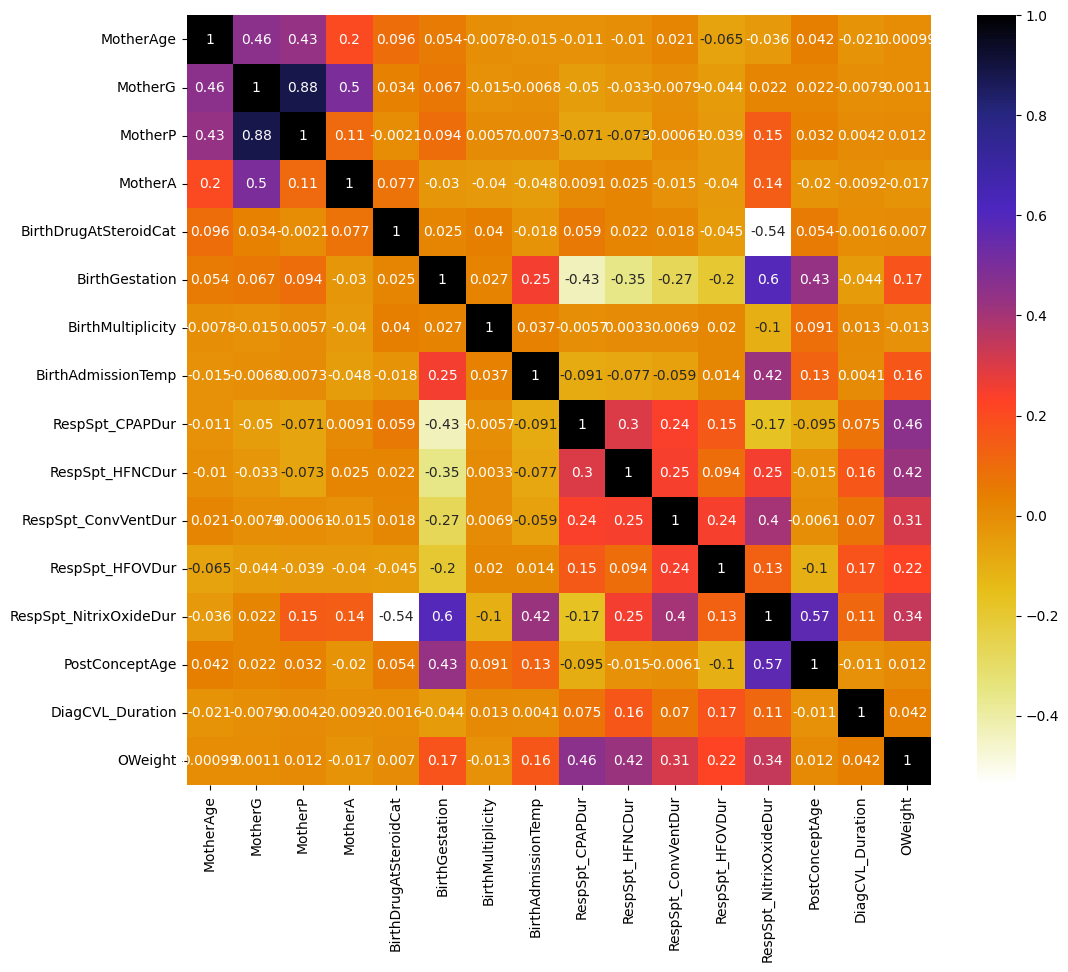

In [18]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [21]:
corr_features

{'MotherP'}

In [22]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,MotherAge,MotherG,MotherA,BirthDrugAtSteroidCat,BirthGestation,BirthMultiplicity,BirthAdmissionTemp,RespSpt_CPAPDur,RespSpt_HFNCDur,RespSpt_ConvVentDur,RespSpt_HFOVDur,RespSpt_NitrixOxideDur,PostConceptAge,DiagCVL_Duration,OWeight
825,26.0,3.0,1.0,2.0,26,1,36.9,5.0,NaN,NaN,123.0,NaN,39.0,20.0,2305
1705,24.0,1.0,0.0,2.0,32,2,36.9,2.0,1.0,NaN,NaN,NaN,NaN,0.0,1740
4134,18.0,1.0,0.0,1.0,28,1,36.0,9.0,NaN,3.0,NaN,NaN,34.0,8.0,1800
3537,36.0,1.0,0.0,NaN,28,1,35.5,10.0,NaN,13.0,NaN,NaN,35.0,0.0,2250
3556,21.0,1.0,0.0,1.0,32,1,36.9,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,25.0,3.0,0.0,2.0,30,2,37.0,6.0,3.0,2.0,NaN,NaN,33.0,2.0,1940
1300,30.0,2.0,0.0,2.0,28,1,37.0,26.0,NaN,3.0,NaN,NaN,33.0,7.0,1715
2383,37.0,1.0,0.0,NaN,23,1,33.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,740
242,24.0,2.0,0.0,2.0,31,1,36.8,2.0,NaN,NaN,NaN,NaN,36.0,0.0,2000
